> ### EEE3314: Introduction to Artificial Intelligence

# Assignment V: Adaboost

### *Assignement Instructions:*
- **Due date**: 11 PM, Nov. 12 (Fri), 2021
- **File name**: [ID_Name_HW5.ipynb]
- Write a program implementing a particular algorithm to solve a given problem.   
- **Report and discuss your results. Analyze the algorithm, theoretically and empirically.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.** We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by yourself so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework
- Signiture: <span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-10-29 21:13:40.690615


In [2]:
%load_ext autoreload
%autoreload 2

## Problem statement

We will use datasets generated from ```sklearn.dataset.make_classification``` and ```sklearn.dataset.make_mooons```. Let's first viaualize the $\texttt{classification}$ and $\texttt{moon}$ datasets with the ```scatter``` function from ```matplotlib.pyplot```.

**Classification dataset**

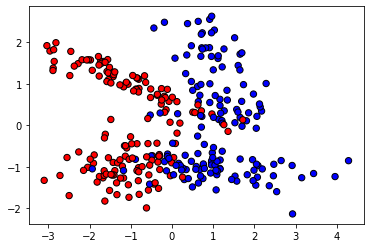

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.datasets import make_classification


cm_bright = ListedColormap(['#FF0000', '#0000FF'])
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm_bright, edgecolors='k')
plt.show()

**Moon dataset**

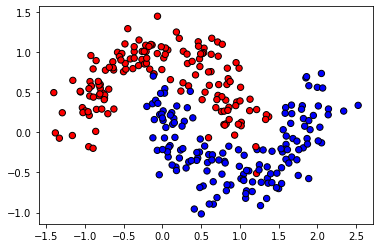

In [4]:
X,y = make_moons(n_samples=300, noise=0.2, random_state=0)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm_bright, edgecolors='k')
plt.show()

We will implement the $\texttt{AdaBoost}$ algorithm. It first trains a classifier on an original dataset and then fits additional classifier on the same dataset but with different weights for traing samples. For example, the weights for incorrectly classified samples increases in order to focus more on hard or important cases, and vice versa.

Let's apply $\texttt{AdaBoost}$ these two datasets.

**NOTE**: In $\texttt{DecisionStump}$ and $\texttt{AdaBoost}$ implementation, exploiting ```sklearn.tree``` and ```sklearn.ensemble``` (or equivalent) **will not be allowed**. You will get no credit otherwise.

### P1. AdaBoost

P1.1 Implement a decision stump (```DecisionStump``` class) using the **threshold split selection algorithm**. A decision stump is a one-level decision tree which makes a prediction using a single input feature. (*15 points*)  
> **Quality metric**: Classification error that computes the fraction of mistakes.  
> **Prediction**: For each node, $\hat{y}=\text{major class}.$

*Refer the lecture note 11 p.53-59.*
  
  
P1.2 Implement an adaboost (```AdaBoost``` class) for binary classification. Note that the AdaBoost algorithm uses a **weighted sampling with replacement** to learn the weak classifier $f_{t}(\mathbf{x})$ with data weights $\alpha$. (*50 points*)  
> **Weighted sampling with data weight**: This samples data points from the original dataset with corresponding sampling probabilities (i.e., weights for individual training samples).
>> For example, let's suppose the following data points $\mathbf{x}$ and corresponding weights $\alpha$: $\mathbf{x}=[x_1, x_2, x_3]$ and $\alpha = [0.1, 0.6, 0.3]$. In the weighted sampling procedure, $x_1$, $x_2$, and $x_3$ are chosen with probabilities of $0.1$, $0.6$, and $0.3$, respectively. That is, the data point with a higher weight is more likely to be chosen.
>  
> **Quality metric**: Classification error that computes the fraction of mistakes.  
> **Compute coefficient**: $\hat{w}_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$  
> **Recompute weight**: $\alpha_{t+1}^{i} = \alpha_{t}^{i} e^{{-\hat{w}_{t} y_{i} f_{t}(\mathbf{x})}}$ , where $y_{i} = 1 \text{or} -1$.  
> **Normalize weight**: $\alpha_{t}^{i} = \frac{\alpha_{t}^{i}}{\sum_{i=1}^{N} \alpha_{t}^{i}}$  
> **Prediction**: $\hat{\mathbf{y}}=\text{sign} \left( \sum_{t=1}^{T} \hat{w_t} f_t(\mathbf{x}) \right)$  
> **Save weak classifier**: Use ```dictionary```, i.e., {```'coefficient'```: $\hat{w}_t$, ```'classifier'```: $f_t(\mathbf{x})$}. Then append the dictionary to the attribute list (```self.classifiers```).  

*Refer the lecture note 12 p.35-37.*

P1.3 Run the code provied to plot the weighted error and the coefficient of each classifier. Analyze the results and relationship between the weighted errors and the coefficients. (*5 points*)  

P1.4 Implement the ```compute_staged_accuracies``` function that inputs boosted classifiers (i.e., a list of dictionary that contains 'coefficient' and 'classifier' as keys), a training dataset, a test dataset, and outputs the prediction accuracies on training and test datasets. Plot the accuracies on training and testing samples, over the number of classiferes. Use the $\frac{\text{number of correct predictions}}{\text{total number of samples}}$ to compute the accuracy. (*5 points*)



### P2. Results Analysis

P2.1 Analyze and contrast the logistic regression and adaboost in terms of objective functions and how to optimize the weights of features in logistic regression and coefficients of weak classifiers in adaboost, theoretically. (*5 points*)

P2.2 Run the code provied to compute train and test accuracies of each classification method. Analyze and contrast the classification methods (logistic regression, decision stump, decision tree, and boosted decision tree) in terms of train and test accuracies. (*10 points*)

P2.3 Run the code provied to plot decision boundaries and prediction accuracies on test dataset. Analyze and contrast the decision boundaries of the classification methods (logistic regression, decision tree, and boosted decision tree). (*10 points*)

---

## Results

In [5]:
from copy import deepcopy

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.model_selection import train_test_split

from project5 import *

### Prepare Dataset

In [6]:
X, y = make_classification(n_samples=400, n_features=15, n_redundant=0, n_informative=12, random_state=1, n_clusters_per_class=2)
y[y == 0] = -1

n_split = 250

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

In [7]:
print(X_train.shape)
print(X_test.shape)

(250, 15)
(150, 15)


---

### P1.1

In [55]:
stump = DecisionStump()
stump.fit(X_train, y_train)

print(f"train: {np.average(stump.predict(X_train) == y_train)}, test: {np.average(stump.predict(X_test) == y_test)}")

TypeError: only integer scalar arrays can be converted to a scalar index

In [46]:
stump.left_prediction

1

In [47]:
stump.right_prediction

-1

In [48]:
stump.threshold

2.5323573629350227

In [49]:
stump.selected_feature

2

---

### P1.2

In [13]:
adaboost_classifier = AdaBoost(100)
adaboost_classifier.fit(X_train, y_train)

print(f"train: {np.average(adaboost_classifier.predict(X_train) == y_train)}, test: {np.average(adaboost_classifier.predict(X_test) == y_test)}")

train: 0.96, test: 0.8533333333333334


In [14]:
classifiers = adaboost_classifier.classifiers
print(len(classifiers))
print(classifiers[0].keys())
print(classifiers[0].values())

100
dict_keys(['classifier', 'coefficient'])
dict_values([<project5.DecisionStump object at 0x7f1cae9102d0>, 0.49224949095034437])


In [15]:
adaboost_classifier.error_history

[0.27199999999999996,
 0.3539915966386554,
 0.32923878611075524,
 0.4001661175920662,
 0.39225440583318255,
 0.42326453465628266,
 0.4062052397782231,
 0.3724729872136949,
 0.3634529426295744,
 0.3522287739562625,
 0.35943132043717674,
 0.42426956010481337,
 0.38530189341206256,
 0.41600063052392966,
 0.3392776095363172,
 0.38764870163618426,
 0.4380878336094765,
 0.39338094746196184,
 0.4350592718058532,
 0.44167170945767004,
 0.41621991543705733,
 0.4816491125430672,
 0.4121309961043548,
 0.42847936226481365,
 0.4169051826919867,
 0.4296663118080841,
 0.4088926630486026,
 0.38868562031428217,
 0.4223015033902216,
 0.42128805530191893,
 0.43513796367693297,
 0.38136648334253065,
 0.4270690456248501,
 0.4159905026623052,
 0.4521351371214059,
 0.457134912550763,
 0.4312563430488955,
 0.4331266535916729,
 0.41793712881433775,
 0.42155038269698825,
 0.4181476352330777,
 0.42930465818377445,
 0.43786823680587766,
 0.4062701252093102,
 0.44892186505795956,
 0.4656530854331204,
 0.4329481564

In [16]:
coefficients = [classifier['coefficient'] for classifier in adaboost_classifier.classifiers]
    
coefficients

[0.49224949095034437,
 0.30076966872707817,
 0.3558149632225985,
 0.2023864996758462,
 0.2189228699979634,
 0.15469316737724143,
 0.18983759478891496,
 0.2608111003507275,
 0.2802042572200005,
 0.30462834864411054,
 0.2889166133111851,
 0.15263527833674206,
 0.23355204897130638,
 0.16960656361037166,
 0.333257544009017,
 0.22860330671119605,
 0.1244630632454409,
 0.2165612645802693,
 0.13061927048044045,
 0.11719012817937301,
 0.1691552904616389,
 0.03671826759056377,
 0.17758144503266501,
 0.144029009985041,
 0.1677454968549493,
 0.141606359520479,
 0.1842724680281809,
 0.22642025850576797,
 0.15666628923657763,
 0.15874401617762987,
 0.13045918957351843,
 0.24187611445891585,
 0.146909755734607,
 0.16962740769928827,
 0.09602377243521838,
 0.08594113527035059,
 0.1383635704164742,
 0.13455285804074002,
 0.16562372815610607,
 0.15820607434150014,
 0.16519109113144353,
 0.14234434472994392,
 0.1249091202938793,
 0.18970309414566938,
 0.10251387605914726,
 0.06880218787533299,
 0.134916

In [17]:
adaboost_classifier.data_weight

array([1.10568872e-04, 1.32751755e-03, 7.88927356e-04, 1.63748688e-02,
       1.00453097e-02, 8.67852818e-03, 9.14118584e-04, 4.54140172e-04,
       6.40836711e-04, 3.46394596e-03, 1.46966096e-03, 8.29883083e-04,
       1.00762302e-02, 7.35676812e-04, 7.88217979e-03, 1.56757687e-03,
       7.80844100e-04, 7.15120889e-04, 6.92264124e-03, 1.97165906e-02,
       1.17564727e-02, 2.17995932e-02, 1.11285265e-03, 3.09486088e-03,
       1.06296157e-02, 6.33853176e-03, 2.70619283e-04, 2.43818969e-03,
       9.01634940e-03, 3.69299792e-03, 1.80171388e-03, 5.55471859e-03,
       7.75437540e-05, 3.25741929e-03, 3.83475033e-03, 5.43400901e-03,
       4.32855793e-04, 1.29424198e-03, 2.50595871e-04, 1.42767009e-04,
       1.20426682e-02, 3.35496612e-03, 2.96708602e-03, 1.78578948e-03,
       1.65723046e-03, 1.07293318e-04, 4.62031773e-03, 6.47348788e-03,
       7.00962690e-03, 6.52941265e-03, 7.34310550e-03, 1.14629611e-03,
       4.09312664e-04, 2.94153270e-04, 8.13153043e-03, 3.38197529e-03,
      

---

### P1.3

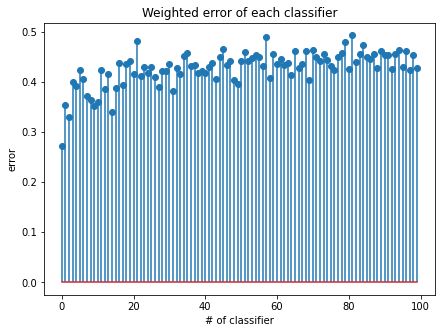

In [18]:
plt.figure(figsize=[7, 5])

plt.stem(adaboost_classifier.error_history)
plt.title('Weighted error of each classifier')
plt.xlabel('# of classifier')
plt.ylabel('error')
plt.show()

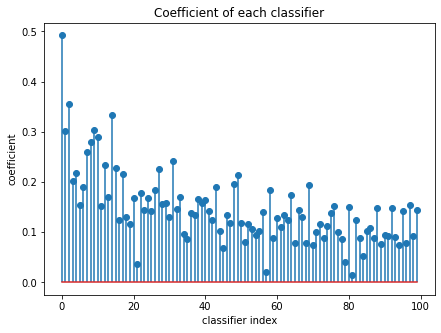

In [19]:
plt.figure(figsize=[7, 5])

plt.stem(coefficients)
plt.title('Coefficient of each classifier')
plt.xlabel('classifier index')
plt.ylabel('coefficient')
plt.show()

Describe your answer here

---

### P1.4

In [20]:
classifiers = adaboost_classifier.classifiers    

acc_train, acc_test = compute_staged_accuracies(classifiers, X_train, y_train, X_test, y_test)

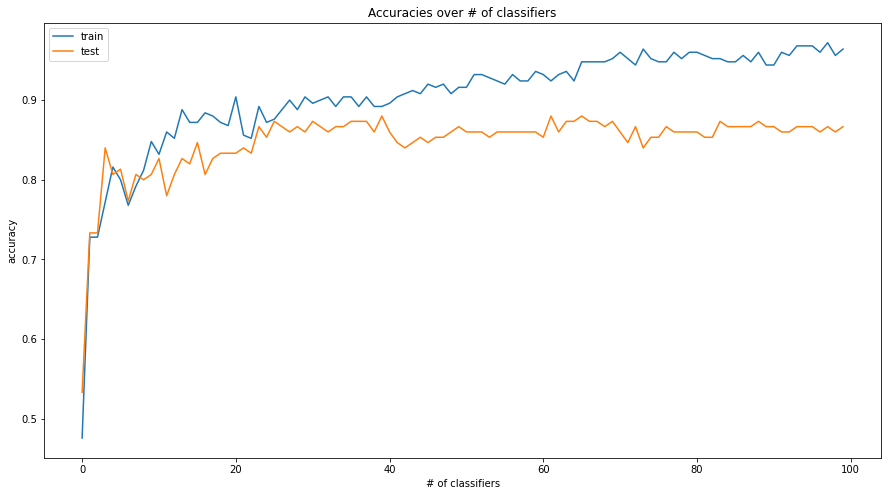

In [21]:
plt.figure(figsize=[15, 8])

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.title('Accuracies over # of classifiers')
plt.xlabel('# of classifiers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Describe your answer here

---

### P2.1 

Describe your analysis here.

---

### P2.2

**Decision Stump**

In [22]:
stump = DecisionStump()
stump.fit(X_train, y_train)
print(f"train: {np.average(stump.predict(X_train) == y_train)}, test: {np.average(stump.predict(X_test) == y_test)}")

train: 0.728, test: 0.7333333333333333


**Decision Tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f"train: {np.average(tree.predict(X_train) == y_train)}, test: {np.average(tree.predict(X_test) == y_test)}")

train: 1.0, test: 0.7866666666666666


**Logisitc Regression**

In [24]:
from sklearn.linear_model import LogisticRegression

regrssor = LogisticRegression()
regrssor.fit(X_train, y_train)
print(f"train: {np.average(regrssor.predict(X_train) == y_train)}, test: {np.average(regrssor.predict(X_test) == y_test)}")

train: 0.82, test: 0.84


**Adaboost**

In [25]:
print(f"train: {np.average(adaboost_classifier.predict(X_train) == y_train)}, test: {np.average(adaboost_classifier.predict(X_test) == y_test)}")

train: 0.96, test: 0.8533333333333334


Describe your answer here

---

### P2.3

**Do not use sklearn implementation of Adaboost.**

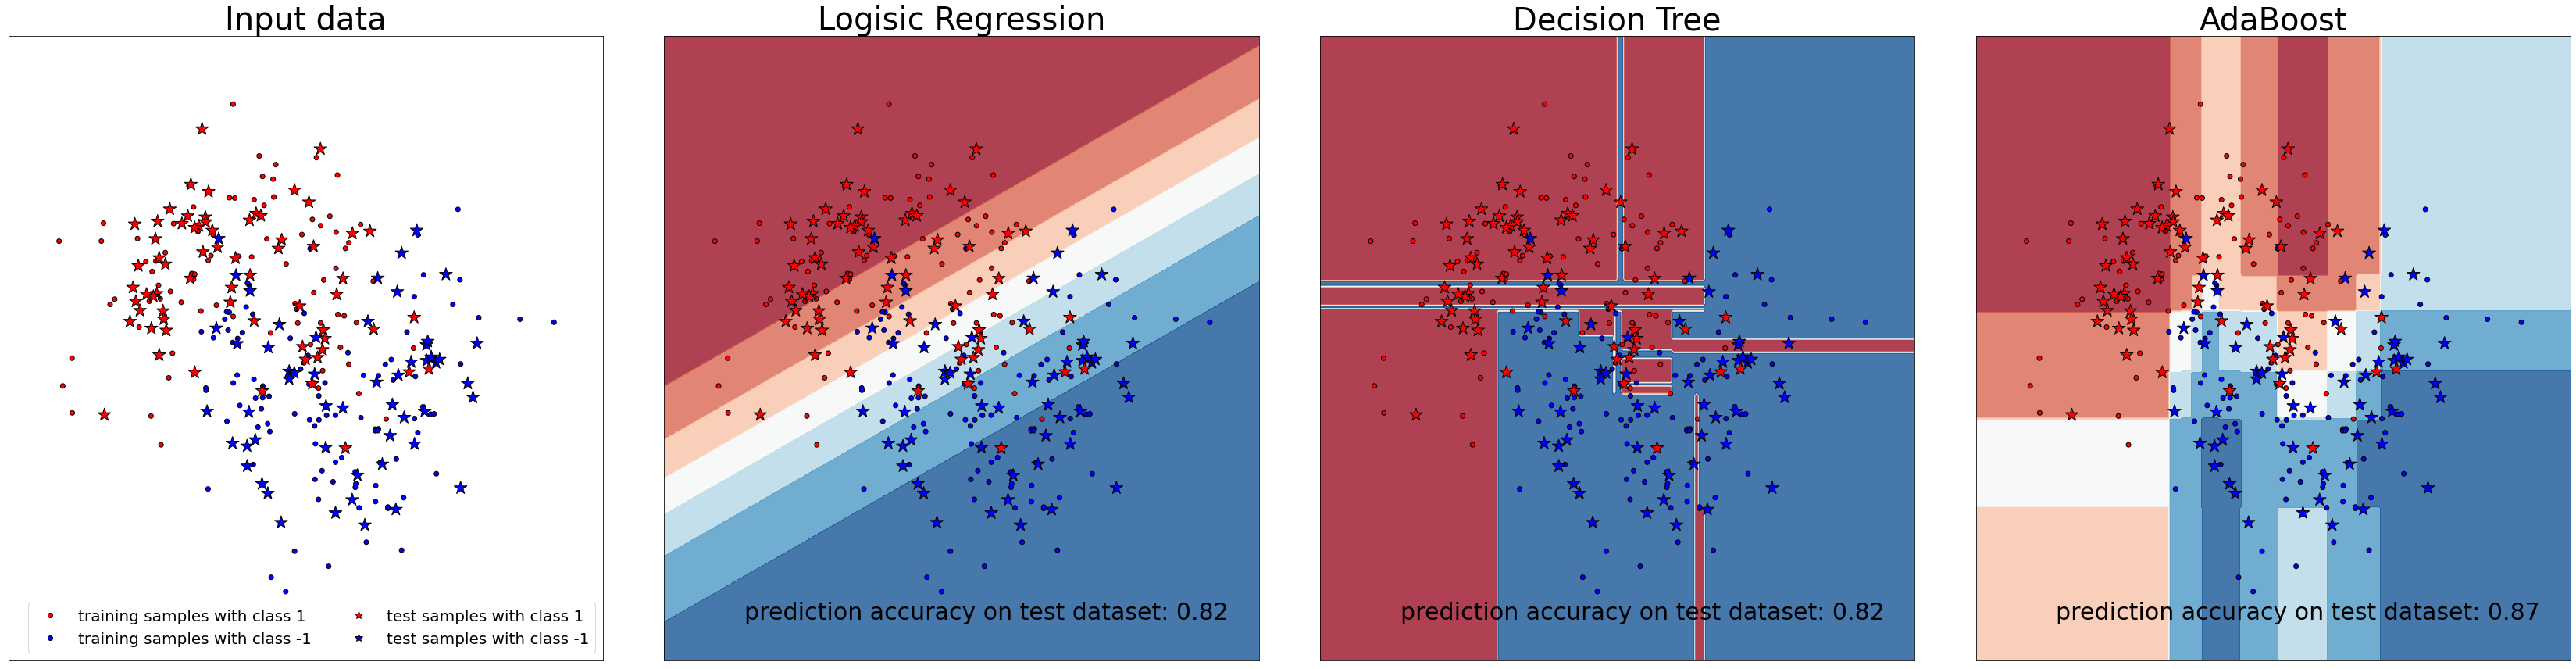

In [26]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

names = ["Logisic Regression", "Decision Tree", "AdaBoost"]


classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    AdaBoost(20) # your implementation.
]

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='training samples with class 1', mfc='#FF0000', mec='k'),
    Line2D([0], [0], marker='o', color='w', label='training samples with class -1', mfc='#0000FF', mec='k'),
    Line2D([0], [0], marker='*', color='w', label='test samples with class 1', mfc='#FF0000', mec='k', ms=10),
    Line2D([0], [0], marker='*', color='w', label='test samples with class -1', mfc='#0000FF', mec='k', ms=10)
]


figure = plt.figure(figsize=(48, 12))
i = 1

# prepare dataset.
X, y = make_moons(n_samples=300, noise=0.4, random_state=0)
y[y == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# generate meshgrid for decision boundaries.
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# plot.
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1, len(classifiers) + 1, 1)
ax.set_title("Input data", size=40)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', label='train samples')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*', label='test samples')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.legend(handles=legend_elements, ncol=2, loc='lower right', fontsize=20)
ax.set_xticks(())
ax.set_yticks(())

# iterate over classifiers
i += 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = np.average(clf.predict(X_test) == y_test)
    
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax.set_title(name, size=40)
    ax.text(xx.max() - .3, yy.min() + .3, ('prediction accuracy on test dataset: %.2f' % score).lstrip('0'), size=30, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()